## Tutorial 7: Genetic Programming

The aim is to maximize the equation:
    
    y = w1*x1+w2*x2+w3*x3+w4*x4+w5*x5+w6*x6
    
    where (x1,x2,x3,x4,x5,x6)=(4,-2,3.5,5,-11,-4.7)
    
    What are the best values for the 6 weights w1 to w6?
    
    We are going to use the genetic algorithm for the best possible values after a number of generations.

In [6]:
def cal_pop_fitness(equation_inputs, pop):
    # Calculating the fitness value of each solution in the current population.
    # The fitness function calulates the sum of products between each input and its corresponding weight.
    fitness = numpy.sum(pop*equation_inputs, axis=1)
    return fitness

def select_mating_pool(pop, fitness, num_parents):
    # Selecting the best individuals in the current generation as parents for producing the offspring of the next generation.
    parents = numpy.empty((num_parents, pop.shape[1]))
    for parent_num in range(num_parents):
        max_fitness_idx = numpy.where(fitness == numpy.max(fitness))
        max_fitness_idx = max_fitness_idx[0][0]
        parents[parent_num, :] = pop[max_fitness_idx, :]
        fitness[max_fitness_idx] = -99999999999
    return parents

def crossover(parents, offspring_size):
    offspring = numpy.empty(offspring_size)
    # The point at which crossover takes place between two parents. Usually, it is at the center.
    crossover_point = numpy.uint8(offspring_size[1]/2)

    for k in range(offspring_size[0]):
        # Index of the first parent to mate.
        parent1_idx = k%parents.shape[0]
        # Index of the second parent to mate.
        parent2_idx = (k+1)%parents.shape[0]
        # The new offspring will have its first half of its genes taken from the first parent.
        offspring[k, 0:crossover_point] = parents[parent1_idx, 0:crossover_point]
        # The new offspring will have its second half of its genes taken from the second parent.
        offspring[k, crossover_point:] = parents[parent2_idx, crossover_point:]
    return offspring

def mutation(offspring_crossover, num_mutations=1):
    mutations_counter = numpy.uint8(offspring_crossover.shape[1] / num_mutations)
    # Mutation changes a number of genes as defined by the num_mutations argument. The changes are random.
    for idx in range(offspring_crossover.shape[0]):
        gene_idx = mutations_counter - 1
        for mutation_num in range(num_mutations):
            # The random value to be added to the member
            random_value = numpy.random.uniform(-1.0, 1.0, 1)
            offspring_crossover[idx, gene_idx] = offspring_crossover[idx, gene_idx] + random_value
            gene_idx = gene_idx + mutations_counter
    return offspring_crossover


In [11]:
import numpy

# Inputs of the equation.
equation_inputs = [4,-2,3.5,5,-11,-4.7]

# Number of the weights we are looking to optimize.
num_weights = len(equation_inputs)

"""
Genetic algorithm parameters:
    Mating pool size
    Population size
    
"""
sol_per_pop = 32
num_parents_mating = 4

# Defining the population size.
pop_size = (sol_per_pop,num_weights) 
print(pop_size)
#Creating the initial population.
new_population = numpy.random.uniform(low=-4.0, high=4.0, size=pop_size)
print(new_population)



(32, 6)
[[-3.15627892  0.15538159  0.66844638  0.47617404 -2.70731849 -1.27550545]
 [ 1.43238539  2.45105812 -3.03359653 -1.54185198  2.4511905  -0.25517272]
 [-2.17898688 -3.16071415  2.53272433  1.40562087  0.57442666 -0.22280713]
 [ 3.77625106 -3.28424321  0.41933189  0.93183959  1.76139932  0.2364904 ]
 [ 3.48728297 -1.10606721  0.19313552  0.39593294  1.98511542  0.8658592 ]
 [ 3.60509473 -3.89281042 -0.77718742 -0.54419666  3.28549014  3.22799237]
 [-3.40595062  0.92734543  1.81915628  2.36522567  2.5943714   1.58691275]
 [-0.73340297 -3.95252022 -1.25378405  0.2777287   0.60688787  3.31571916]
 [-0.86001212  2.18117231 -1.92838547 -1.76601299  3.74574413 -3.75290768]
 [-0.65466605 -2.87030312  1.4934793  -2.36210497  0.76326274  2.80923792]
 [-2.84572281 -2.55868975 -0.6443065  -3.11588892  2.00488285  2.2016685 ]
 [ 3.85070093  0.67399494 -0.0479616  -0.97915931 -3.99390102 -2.06089575]
 [-3.28226715 -2.44621464  2.76963276  3.86104748 -0.70511479 -1.35045682]
 [ 3.25576406 -3.

Generation :  0
Fitness
[ 27.55993273 -43.26320614   8.22662053   7.31345284  -7.0889025
 -34.54709524 -33.28189332 -20.28781871 -46.9463265  -25.06071364
 -56.50158231  62.61027294  34.86572249  30.06653047   0.80562198
 -11.98472997  19.1662343  -37.69291312 -51.68271881  45.44357926
 -27.24140423 -53.06976273 -15.42880812  54.99810821  10.54152944
 -23.5871461  -14.60229723 -21.48179081  26.80660886  18.73674444
 -38.03650407 -62.21841056]
Best result :  62.610272941645135
Parents
[[ 3.85070093  0.67399494 -0.0479616  -0.97915931 -3.99390102 -2.06089575]
 [ 3.69239722  1.63153336  1.07850136 -1.55832931 -2.70200784 -3.78433864]
 [ 2.46029799 -2.08016819 -3.24698715  3.19006957 -3.38348771  2.20472483]
 [-3.28226715 -2.44621464  2.76963276  3.86104748 -0.70511479 -1.35045682]]
Crossover
[[ 3.85070093  0.67399494 -0.0479616  -1.55832931 -2.70200784 -3.78433864]
 [ 3.69239722  1.63153336  1.07850136  3.19006957 -3.38348771  2.20472483]
 [ 2.46029799 -2.08016819 -3.24698715  3.86104748 

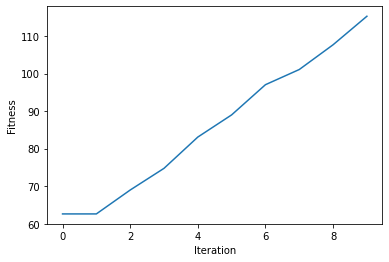

In [12]:
best_outputs = []
num_generations = 10
for generation in range(num_generations):
    print("Generation : ", generation)
    # Measuring the fitness of each member in the population.
    fitness = cal_pop_fitness(equation_inputs, new_population)
    print("Fitness")
    print(fitness)

    best_outputs.append(numpy.max(numpy.sum(new_population*equation_inputs, axis=1)))
    # The best result in the current iteration.
    print("Best result : ", numpy.max(numpy.sum(new_population*equation_inputs, axis=1)))
    
    # Selecting the best parents in the population for mating.
    parents = select_mating_pool(new_population, fitness, 
                                      num_parents_mating)
    print("Parents")
    print(parents)

    # Generating next generation using crossover.
    offspring_crossover = crossover(parents,
                                       offspring_size=(pop_size[0]-parents.shape[0], num_weights))
    print("Crossover")
    print(offspring_crossover)

    # Adding some variations to the offspring using mutation.
    offspring_mutation = mutation(offspring_crossover, num_mutations=2)
    print("Mutation")
    print(offspring_mutation)

    # Creating the new population based on the parents and offspring.
    new_population[0:parents.shape[0], :] = parents
    new_population[parents.shape[0]:, :] = offspring_mutation
    
# Getting the best solution after iterating finishing all generations.
#At first, the fitness is calculated for each solution in the final generation.
fitness = cal_pop_fitness(equation_inputs, new_population)
# Then return the index of that solution corresponding to the best fitness.
best_match_idx = numpy.where(fitness == numpy.max(fitness))

print("Best solution : ", new_population[best_match_idx, :])
print("Best solution fitness : ", fitness[best_match_idx])


import matplotlib.pyplot
matplotlib.pyplot.plot(best_outputs)
matplotlib.pyplot.xlabel("Iteration")
matplotlib.pyplot.ylabel("Fitness")
matplotlib.pyplot.show()